### Importing Libraries

In [1]:
import tensorflow as tf
tf.__version__

'2.0.0'

In [2]:
import sys
from pathlib import Path

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

### Building CNN Model

In [6]:
model=Sequential()

In [7]:
model.add(Convolution2D(32,3,3,input_shape=(128,128,3),activation='relu'))

In [8]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [9]:
model.add(Convolution2D(32,3,3,activation='relu'))

In [10]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [11]:
model.add(Flatten())

In [12]:
model.add(Dense(units=20,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))

In [13]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 42, 42, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 21, 21, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 7, 7, 32)          9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 3, 3, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 288)               0         
_________________________________________________________________
dense (Dense)                (None, 20)                5780      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 2

### Image Augmentation for better accuracy

###### Helps to enrich our data set with less number of images to prevent overfitting.It takes the same images iwth flips and different sizes.

In [15]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

In [16]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [17]:
training_set = train_datagen.flow_from_directory(
        './dataset/training_set',
        target_size=(128, 128),
        batch_size=32,
        class_mode='binary')

Found 8000 images belonging to 2 classes.


In [18]:
testing_set = test_datagen.flow_from_directory(
        './dataset/test_set',
        target_size=(128,128),
        batch_size=32,
        class_mode='binary')

Found 2000 images belonging to 2 classes.


In [19]:
model.fit_generator(
        training_set,
        steps_per_epoch=8000,
        epochs=5,
        validation_data=testing_set,
        validation_steps=2000)

Epoch 1/5
8000/8000 [==============================] - 1723s 215ms/step - loss: 0.5051 - accuracy: 0.7451 - val_loss: 0.4616 - val_accuracy: 0.7862
Epoch 2/5
8000/8000 [==============================] - 1584s 198ms/step - loss: 0.4112 - accuracy: 0.8090 - val_loss: 0.4260 - val_accuracy: 0.8010
Epoch 3/5
8000/8000 [==============================] - 1615s 202ms/step - loss: 0.3691 - accuracy: 0.8320 - val_loss: 0.4502 - val_accuracy: 0.7942
Epoch 4/5
8000/8000 [==============================] - 1723s 215ms/step - loss: 0.3385 - accuracy: 0.8481 - val_loss: 0.4409 - val_accuracy: 0.8091
Epoch 5/5
8000/8000 [==============================] - 1678s 210ms/step - loss: 0.3176 - accuracy: 0.8590 - val_loss: 0.4647 - val_accuracy: 0.8060


## <center>Model is 85 % accurate on Training set and 80% accurate on testing set</center>

### Predicting the model with new image

In [20]:
from tensorflow.keras.preprocessing import image

In [22]:
test_image=image.load_img('dataset/single_prediction/cat_or_dog_1.jpg',target_size=(128,128))

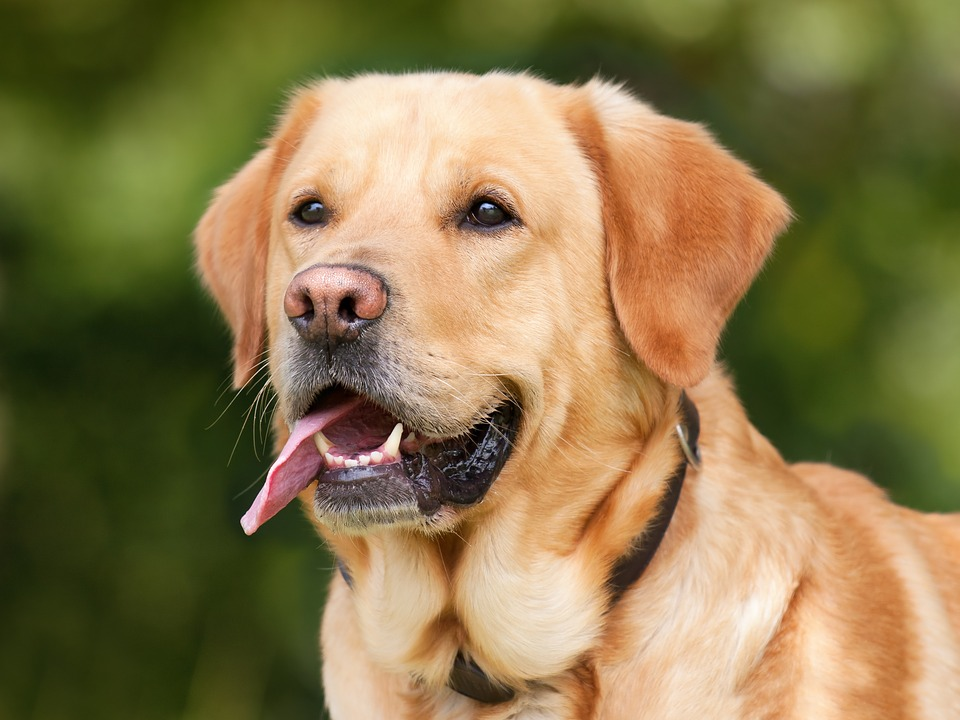

In [33]:
from IPython.display import Image
Image(filename='dataset/single_prediction/cat_or_dog_1.jpg',width=250,height=250) 

In [23]:
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)

In [35]:
result = model.predict(test_image)
result

array([[1.]], dtype=float32)

In [34]:
training_set.class_indices

{'cats': 0, 'dogs': 1}

In [36]:
if result[0][0] == 1:
    prediction = 'dog'
else:
    prediction = 'cat'

In [37]:
prediction

'dog'

### Saving The Model and Using it

In [47]:
from tensorflow.keras.models import load_model

In [45]:
model.save("cat_dog.h5")

In [48]:
cat_dog_classifier = load_model('cat_dog.h5')

In [65]:
test_image=image.load_img('dataset/single_prediction/cat_or_dog_2.jpg',target_size=(128,128))

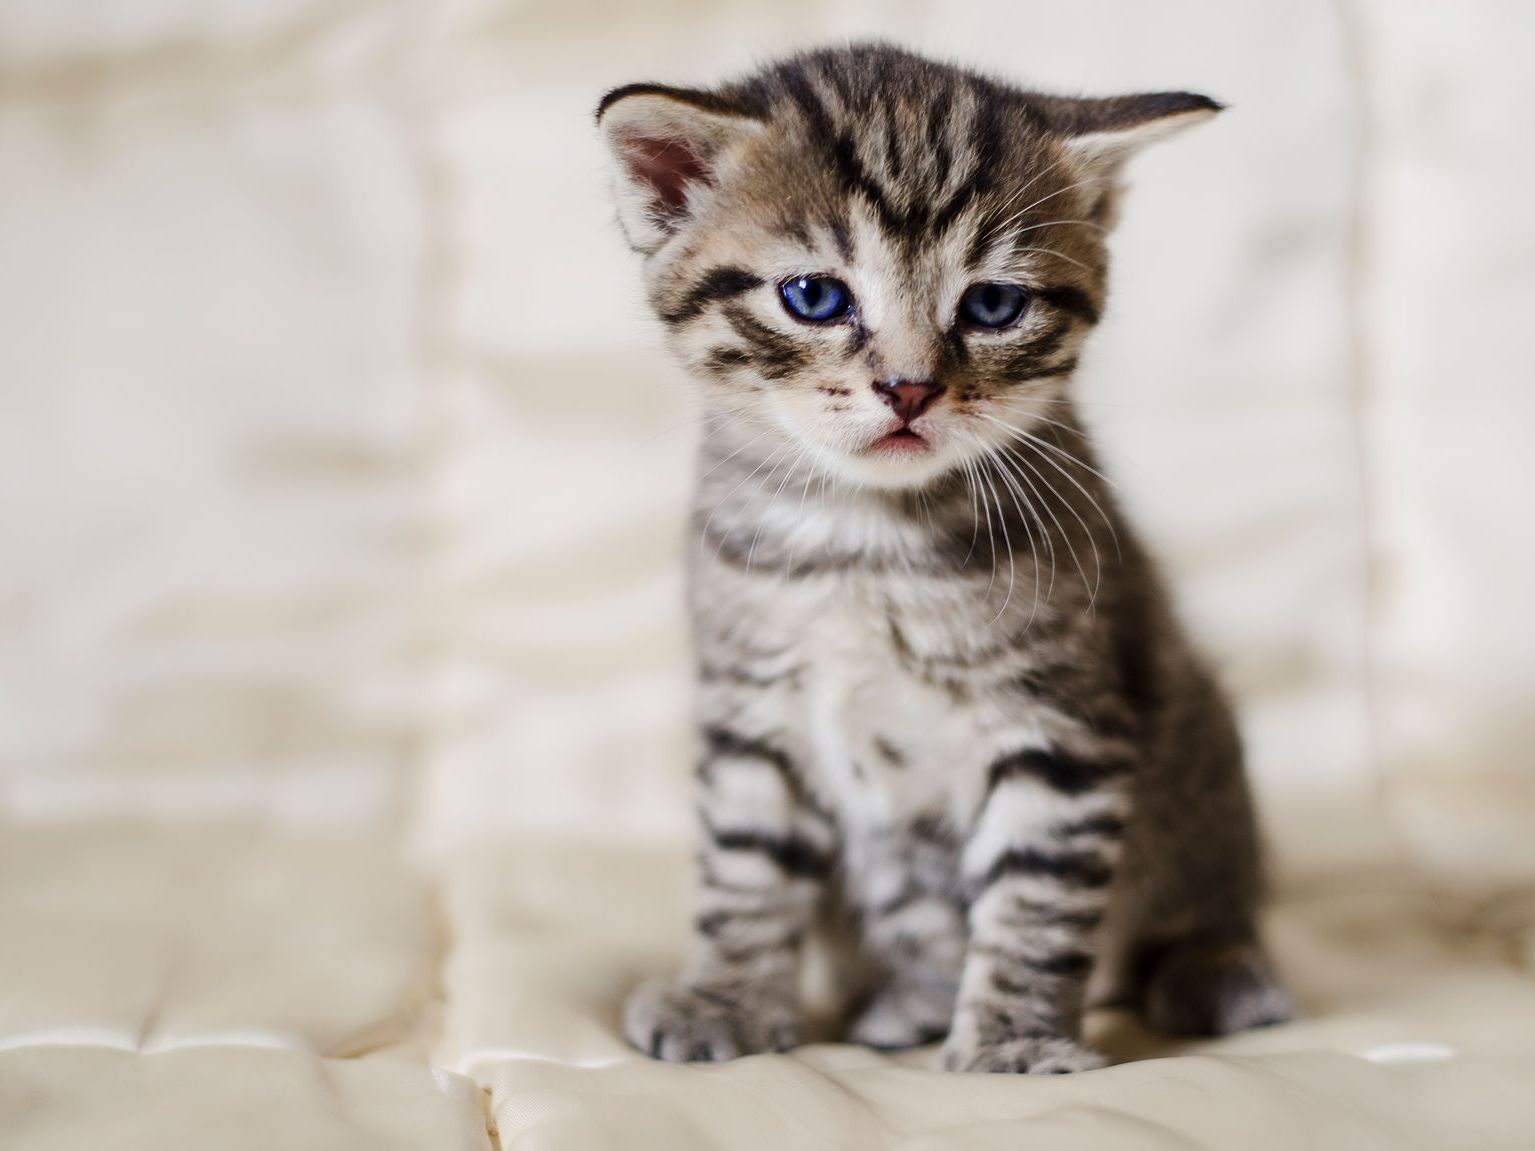

In [66]:
from IPython.display import Image
Image(filename='dataset/single_prediction/cat_or_dog_2.jpg',width=250,height=250) 

In [67]:
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)

In [68]:
result = cat_dog_classifier.predict(test_image)
result

array([[0.]], dtype=float32)

In [69]:
if result[0][0] == 1:
    prediction = 'dog'
else:
    prediction = 'cat'
prediction

'cat'